In [12]:
# 导入数据分析库pandas，官方文档https://pandas.pydata.org/docs/
import pandas as pd

# 从本地导入数据
df = pd.read_csv('C:\\Users\\mazhen\\Desktop\\sh000001.csv')
# 查看数据
df.head()

,time,open,close,high,low,volume,money
0,2020/5/7 9:31,2876.47,2873.08,2876.47,2872.78,907288,0
1,2020/5/7 9:32,2872.75,2869.95,2872.75,2869.95,410307,0
2,2020/5/7 9:33,2870.31,2870.28,2871.27,2869.56,391156,0
3,2020/5/7 9:34,2870.67,2871.66,2872.34,2870.67,364079,0
4,2020/5/7 9:35,2871.68,2872.11,2872.11,2871.38,355139,0


In [13]:
# 取出时间
raw_time = pd.to_datetime(df.pop('time'), format='%Y/%m/%d %H:%M')

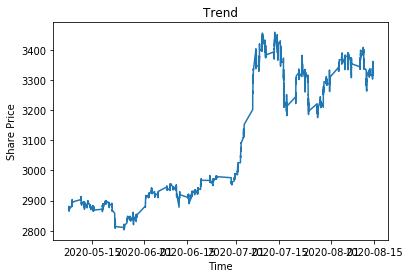

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns

# 折线图：股票走势
plt.plot(raw_time, df['close'])
plt.xlabel('Time')
plt.ylabel('Share Price')
plt.title('Trend')
plt.show()

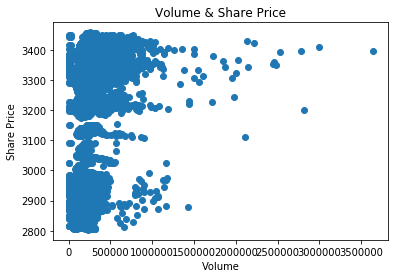

In [16]:
# 散点图：成交量和股价

plt.scatter(df['volume'], df['close'])
plt.xlabel('Volume')
plt.ylabel('Share Price')
plt.title('Volume & Share Price')
plt.show()

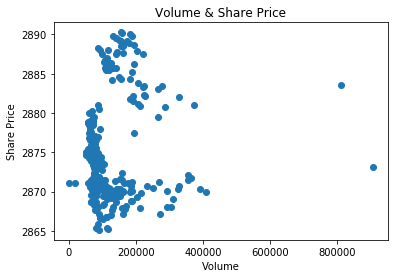

In [17]:
plt.scatter(df['volume'][:300], df['close'][:300])  # 切片，取前300组数据
plt.xlabel('Volume')
plt.ylabel('Share Price')
plt.title('Volume & Share Price')
plt.show()

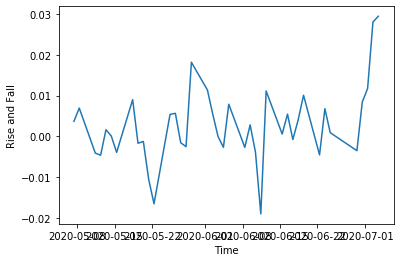

In [18]:
# 涨跌幅度
daily_return = df['close'][0::240].pct_change().dropna()
plt.plot(raw_time[0::240][:40], daily_return[:40])
plt.xlabel('Time')
plt.ylabel('Rise and Fall')
plt.show()

(array([ 1.,  3.,  4., 28., 21.,  7.,  4.,  0.,  0.,  1.]),
 array([-0.03890164, -0.02889666, -0.01889167, -0.00888669,  0.0011183 ,
         0.01112328,  0.02112826,  0.03113325,  0.04113823,  0.05114322,
         0.0611482 ]),
 <a list of 10 Patch objects>)

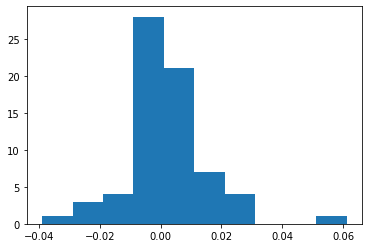

In [19]:
# 直方图
plt.hist(daily_return)

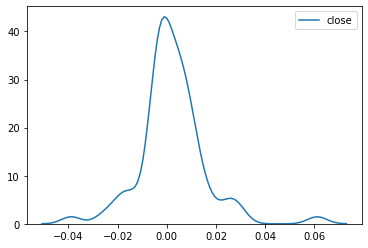

In [20]:
# 核密度估计
sns.kdeplot(daily_return)

In [21]:
# 相关系数矩阵
correlation = df.corr()
print(correlation)

            open     close      high       low    volume  money
open    1.000000  0.999970  0.999989  0.999989  0.414392    NaN
close   0.999970  1.000000  0.999989  0.999989  0.414456    NaN
high    0.999989  0.999989  1.000000  0.999987  0.415657    NaN
low     0.999989  0.999989  0.999987  1.000000  0.413202    NaN
volume  0.414392  0.414456  0.415657  0.413202  1.000000    NaN
money        NaN       NaN       NaN       NaN       NaN    NaN


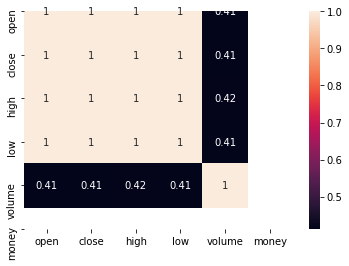

In [22]:
sns.heatmap(correlation, annot=True)

In [24]:
# 导入必要库
import pandas as pd  # 数据处理
import datetime  # 时间格式处理
from matplotlib.pylab import date2num  # 时间格式处理
from matplotlib import pyplot as plt  # 绘图
from mplfinance.original_flavor import candlestick_ochl  # 绘制k线图
from matplotlib import ticker as mticker  # 刻度处理
from matplotlib import dates as mdates  # 时间格式处理

data = pd.read_csv('C:\\Users\\mazhen\\Desktop\\sh000001.csv')
data = data.dropna().reset_index().drop(columns='index')
raw_time = data.pop('time')



In [30]:
date_times = []
dates = []
times = []
date_time_format = '%Y/%m/%d %H:%M'  # 原str中的日期-时间格式
date_format = '%Y/%m/%d'  # 待转日期格式
time_format = '%H:%M'  # 待转时间格式

# 将str转为datetime.datetime
for i in raw_time:
    date_times.append(datetime.datetime.strptime(i, date_time_format))

# 将日期与时间拆开，且此时的日期与时间的类型又变成str
for date_time in date_times:
    dates.append(date_time.strftime(date_format))
    times.append(date_time.strftime(time_format))

# 把分离并调整格式的日期和时间储存在data中
data['date'] = dates
data['time'] = times
data_ = data.copy()  # 为避免污染源数据，将数据拷贝至新的DataFrame中进行处理，copy()方法默认深拷贝，之后我们还会提到这个概念

In [31]:
data_.drop(data_[(data_.time < '09:31:00') | (data_.time > '15:00:00')].index, inplace=True)  # 把非开盘时间通过字符串比较大小去除
data_ = data_.reset_index().drop(columns='index')
data_.head()

,open,close,high,low,volume,money,date,time
0,2872.75,2869.95,2872.75,2869.95,410307,0,2020/05/07,09:32
1,2870.31,2870.28,2871.27,2869.56,391156,0,2020/05/07,09:33
2,2870.67,2871.66,2872.34,2870.67,364079,0,2020/05/07,09:34
3,2871.68,2872.11,2872.11,2871.38,355139,0,2020/05/07,09:35
4,2871.91,2870.30,2871.91,2870.15,325600,0,2020/05/07,09:36


In [32]:
Open = data_['open'][0::240].reset_index().drop(columns='index')
Close = data_['close'][239::240].reset_index().drop(columns='index')

In [33]:
High = data_[['high', 'date']].groupby('date').max().reset_index()
Low = data_[['low', 'date']].groupby('date').min().reset_index()
Dates = High['date']

In [34]:
plot_dates = []
for Date in Dates:
    plot_date = datetime.datetime.strptime(Date, date_format)  # 先把日期格式转回datetime.datetime以满足date2num()的类型要求
    plot_dates.append(date2num(plot_date))

In [35]:
plot_mat = pd.DataFrame()
plot_mat['time'] = plot_dates
plot_mat['open'] = Open
plot_mat['close'] = Close
plot_mat['high'] = High['high']
plot_mat['low'] = Low['low']
plot_mat.head()

,time,open,close,high,low
0,737552.0,2872.75,2880.96,2882.02,2864.58
1,737553.0,2881.05,2906.41,2903.80,2879.20
2,737556.0,2906.64,2894.13,2914.28,2884.38
3,737557.0,2894.17,2880.86,2897.90,2871.27
4,737558.0,2880.67,2883.17,2900.26,2875.55


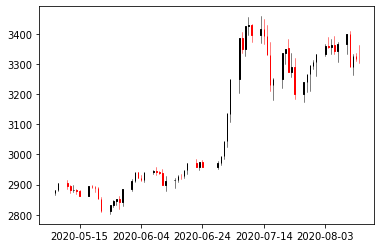

In [36]:
fig, ax = plt.subplots()
candlestick_ochl(ax, plot_mat.values)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.show()

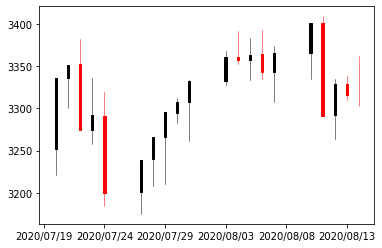

In [40]:
fig, ax = plt.subplots()
candlestick_ochl(ax, plot_mat[50:80].values)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
plt.show()

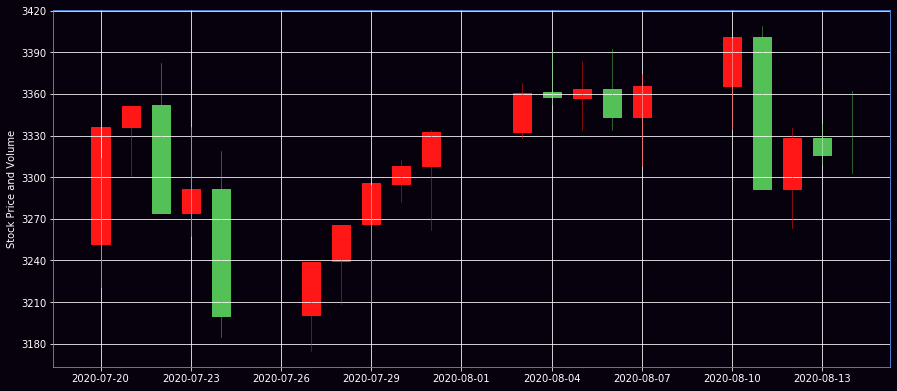

In [42]:
fig = plt.figure(facecolor='#07000d', figsize=(15, 10))  # 设置画布背景颜色与画布大小
ax = plt.subplot2grid((6, 4), (1, 0), rowspan=4, colspan=4, facecolor='#07000d')  

'''
参数分别为：shape，location，rowspan，colspan

shape设置网格布局，(6, 4)即6行4列，location设置起始画图位置，rowspan与colspan分别代表图形在行列上的跨度

这里k线图从第2行，第1列起画，占4行4列

之所以设置6行，是因为还有两个子图分别在上下(第1行和第6行)，可以见成品图

'''
candlestick_ochl(ax, plot_mat[50:80].values, width=0.6, colorup='#ff1717', colordown='#53c156')  # 设置线宽与涨跌颜色
ax.grid(True, color='w')  # 设置网格及其颜色(白色)
ax.xaxis.set_major_locator(mticker.MaxNLocator(10))  # 设置横轴刻度，MaxNLocator确定最多显示多少个刻度
ax.yaxis.set_major_locator(mticker.MaxNLocator())  # 设置纵轴刻度，不填参数则MaxNLocator自动
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # 设置横轴显示为时间
ax.yaxis.label.set_color('w')  # 设置y轴标签的颜色(白色)
ax.spines['bottom'].set_color('#5998ff')  # 设置底部轴颜色
ax.spines['top'].set_color('#5998ff')  # 设置顶部轴颜色
ax.spines['left'].set_color('#5998ff')  # 设置左轴颜色
ax.spines['right'].set_color('#5998ff')  # 设置右轴颜色
ax.tick_params(axis='y', colors='w')  # 设置y轴刻度颜色
ax.tick_params(axis='x', colors='w')  # 设置x轴刻度颜色
plt.ylabel('Stock Price and Volume', color='w')  # y轴标签
plt.show()

In [43]:
mov_avg_ten = plot_mat['close'].rolling(window=10).mean() # 计算每10天收盘价的均值，每次向下滚动1天
mov_avg_thirty = plot_mat['close'].rolling(window=30).mean()  # 计算每30天收盘价的均值，每次向下滚动1天

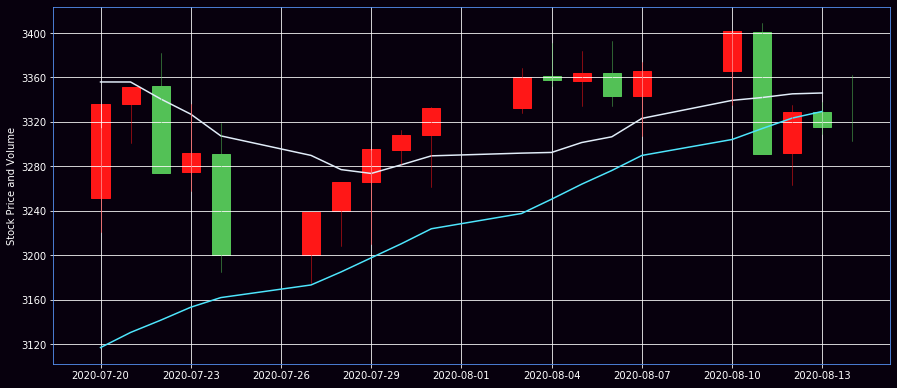

In [44]:
fig = plt.figure(facecolor='#07000d', figsize=(15, 10))
ax = plt.subplot2grid((6, 4), (1, 0), rowspan=4, colspan=4, facecolor='#07000d')

# 绘制10日与30日均线
ax.plot(plot_mat.time[50:80].values, mov_avg_ten[50:80], '#e1edf9', label='10days', linewidth=1.5)  
ax.plot(plot_mat.time[50:80].values, mov_avg_thirty[50:80], '#4ee6fd', label='10days', linewidth=1.5)

candlestick_ochl(ax, plot_mat[50:80].values, width=0.6, colorup='#ff1717', colordown='#53c156')
ax.grid(True, color='w')
ax.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax.yaxis.set_major_locator(mticker.MaxNLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.yaxis.label.set_color('w')
ax.spines['bottom'].set_color('#5998ff')
ax.spines['top'].set_color('#5998ff')
ax.spines['left'].set_color('#5998ff')
ax.spines['right'].set_color('#5998ff')
ax.tick_params(axis='y', colors='w')
ax.tick_params(axis='x', colors='w')
plt.ylabel('Stock Price and Volume', color='w')
plt.show()

In [45]:
Volume = data_[['date', 'volume']].groupby(by='date').sum().reset_index()

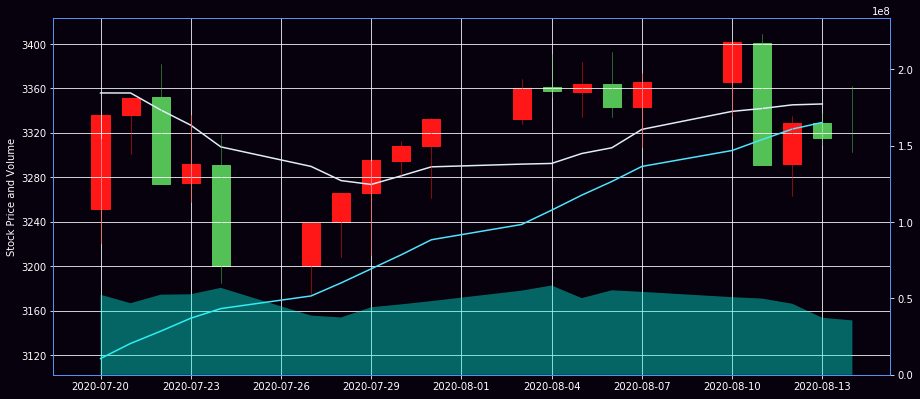

In [46]:
fig = plt.figure(facecolor='#07000d', figsize=(15, 10))
ax = plt.subplot2grid((6, 4), (1, 0), rowspan=4, colspan=4, facecolor='#07000d')
ax.plot(plot_mat.time[50:80].values, mov_avg_ten[50:80], '#e1edf9', label='10days', linewidth=1.5)  
ax.plot(plot_mat.time[50:80].values, mov_avg_thirty[50:80], '#4ee6fd', label='10days', linewidth=1.5)
candlestick_ochl(ax, plot_mat[50:80].values, width=0.6, colorup='#ff1717', colordown='#53c156')
ax.grid(True, color='w')
ax.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax.yaxis.set_major_locator(mticker.MaxNLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.yaxis.label.set_color('w')
ax.spines['bottom'].set_color('#5998ff')
ax.spines['top'].set_color('#5998ff')
ax.spines['left'].set_color('#5998ff')
ax.spines['right'].set_color('#5998ff')
ax.tick_params(axis='y', colors='w')
ax.tick_params(axis='x', colors='w')
plt.ylabel('Stock Price and Volume', color='w')


# 绘制成交量图
ax_ = ax.twinx()  # 共享绘图区域
ax_.fill_between(plot_mat.time[50:80].values, 0, Volume.volume[50:80].values,
                facecolor='#00ffe8', alpha=0.4)  # 把[0, volume]之间空白填充颜色，alpha设置透明度
ax_.grid(False)  # 不显示成交量的网格
ax_.set_ylim(0, 4*Volume.volume.values[50:80].max())  # 成交量的y轴范围，为使成交量线处在较下方，设置刻度最大值为成交量最大值的四倍
ax_.spines['bottom'].set_color('#5998ff')
ax_.spines['top'].set_color('#5998ff')
ax_.spines['left'].set_color('#5998ff')
ax_.spines['right'].set_color('#5998ff')
ax_.tick_params(axis='y', colors='w')
ax_.tick_params(axis='x', colors='w')

plt.show()

In [47]:
def cal_rsi(df0, period=6):  # 默认周期为6日
    df0['diff'] = df0['close'] - df0['close'].shift(1)  # 用diff储存两天收盘价的差
    df0['diff'].fillna(0, inplace=True)  # 空值填充为0
    df0['up'] = df0['diff']  # diff赋值给up
    df0['down'] = df0['diff']  # diff赋值给down
    df0['up'][df0['up'] < 0] = 0  # 把up中小于0的置零
    df0['down'][df0['down'] > 0] = 0  # 把down中大于0的置零
    df0['avg_up'] = df0['up'].rolling(period).sum() / period  # 计算period天内平均上涨点数
    df0['avg_down'] = abs(df0['down'].rolling(period).sum() / period)  # 计算period天内评价下跌点数
    df0['avg_up'].fillna(0, inplace=True)  # 空值填充为0
    df0['avg_down'].fillna(0, inplace=True)  # 空值填充为0
    df0['rsi'] = 100 - 100 / (1 + (df0['avg_up'] / df0['avg_down']))  # 计算RSI
    return df0  # 返回原DataFrame

In [48]:
plot_mat = cal_rsi(plot_mat)

[]

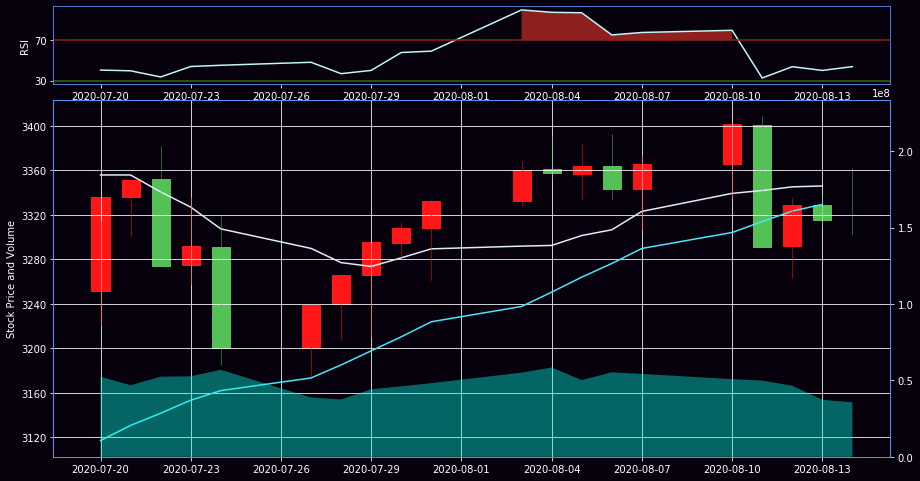

In [50]:
fig = plt.figure(facecolor='#07000d', figsize=(15, 10))
ax = plt.subplot2grid((6, 4), (1, 0), rowspan=4, colspan=4, facecolor='#07000d')
ax.plot(plot_mat.time[50:80].values, mov_avg_ten[50:80], '#e1edf9', label='10days', linewidth=1.5)  
ax.plot(plot_mat.time[50:80].values, mov_avg_thirty[50:80], '#4ee6fd', label='10days', linewidth=1.5)
candlestick_ochl(ax, plot_mat[50:80].values, width=0.6, colorup='#ff1717', colordown='#53c156')
ax.grid(True, color='w')
ax.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax.yaxis.set_major_locator(mticker.MaxNLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.yaxis.label.set_color('w')
ax.spines['bottom'].set_color('#5998ff')
ax.spines['top'].set_color('#5998ff')
ax.spines['left'].set_color('#5998ff')
ax.spines['right'].set_color('#5998ff')
ax.tick_params(axis='y', colors='w')
ax.tick_params(axis='x', colors='w')
plt.ylabel('Stock Price and Volume', color='w')
ax_ = ax.twinx()
ax_.fill_between(plot_mat.time[50:80].values, 0, Volume.volume[50:80].values,
                facecolor='#00ffe8', alpha=0.4)
ax_.grid(False)
ax_.set_ylim(0, 4*Volume.volume[50:80].values.max())
ax_.spines['bottom'].set_color('#5998ff')
ax_.spines['top'].set_color('#5998ff')
ax_.spines['left'].set_color('#5998ff')
ax_.spines['right'].set_color('#5998ff')
ax_.tick_params(axis='y', colors='w')
ax_.tick_params(axis='x', colors='w')

# 绘制RSI曲线

ax0 = plt.subplot2grid((6, 4), (0, 0), sharex=ax, rowspan=1, colspan=4, facecolor='#07000d')  # 第1行第1列起画，占1行4列
col_rsi = '#c1f9f7'  # RSI曲线的颜色
col_pos = '#8f2020'  # 上辅助线及其填充色
col_neg = '#386d13'  # 下辅助线及其填充色
ax0.plot(plot_mat.time[50:80].values, plot_mat.rsi[50:80].values, col_rsi, linewidth=1.5)  # RSI曲线及其颜色，线宽
ax0.axhline(70, color=col_pos)  # 上辅助线及其颜色
ax0.axhline(30, color=col_neg)  # 下辅助线及其颜色
ax0.fill_between(plot_mat.time[50:80].values, plot_mat.rsi[50:80].values, 70, where=(plot_mat.rsi.values[50:80] >= 70),
                 facecolors=col_pos)  # 把RSI曲线大于等于70的部分填充为红色
ax0.fill_between(plot_mat.time[50:80].values, plot_mat.rsi[50:80].values, 30, where=(plot_mat.rsi.values[50:80] <= 30),
                 facecolors=col_neg)  # 把RSI曲线小于等于30的部分填充为绿色
ax0.set_yticks([30, 70])  # 设置辅助线的刻度
ax0.spines['bottom'].set_color("#5998ff")
ax0.spines['top'].set_color("#5998ff")
ax0.spines['left'].set_color("#5998ff")
ax0.spines['right'].set_color("#5998ff")
ax0.tick_params(axis='x', colors='w')
ax0.tick_params(axis='y', colors='w')
plt.ylabel('RSI', color='w')

plt.plot()

In [51]:
def cal_ema(df0, period, is_dea=False):  # DEA与EMA的计算方式相同，封装在同一个函数中，用is_dea来确认是否是DEA
    for i in range(len(df0)):
        if not is_dea:
            if i == 0:
                df0.loc[i, 'ema'+str(period)] = df0.loc[i, 'close']  # EMA初始值为当天收盘价
            else:
                df0.loc[i, 'ema'+str(period)] = (2*df0.loc[i, 'close']+(period-1)*df0.loc[i-1, 'ema'+str(period)])/(period+1)  # 按公式计算
            ema = df0['ema'+str(period)]
        else:
            if i == 0:
                df0.loc[i, 'dea'+str(period)] = df0.loc[i, 'dif']
            else:
                df0.loc[i, 'dea'+str(period)] = ((period-1)*df0.loc[i-1, 'dea'+str(period)]+2*df0.loc[i, 'dif']) / (period+1)
            ema = df0['dea'+str(period)]
    return ema

In [52]:
def cal_macd(df0, short=12, long=26, m=9):
    short_ema = cal_ema(df0, short)  # 计算12日EMA
    long_ema = cal_ema(df0, long)  # 计算26日EMA
    df0['dif'] = short_ema - long_ema  # 计算DIF
    dea = cal_ema(df0, m, is_dea=True)  # 计算DEA
    df0['macd'] = 2 * (df0['dif'] - df0['dea'+str(m)])  # 计算MACD
    return df0

In [53]:
plot_mat = cal_macd(plot_mat)

[]

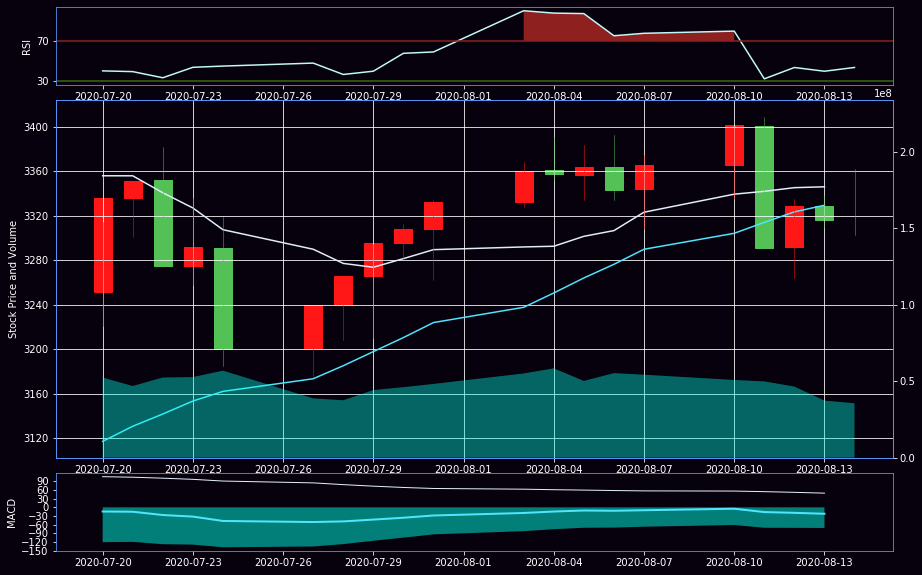

In [56]:
fig = plt.figure(facecolor='#07000d', figsize=(15, 10))
ax = plt.subplot2grid((6, 4), (1, 0), rowspan=4, colspan=4, facecolor='#07000d')
ax.plot(plot_mat.time[50:80].values, mov_avg_ten[50:80], '#e1edf9', label='10days', linewidth=1.5)  
ax.plot(plot_mat.time[50:80].values, mov_avg_thirty[50:80], '#4ee6fd', label='10days', linewidth=1.5)
candlestick_ochl(ax, plot_mat[50:80].values, width=0.6, colorup='#ff1717', colordown='#53c156')
ax.grid(True, color='w')
ax.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax.yaxis.set_major_locator(mticker.MaxNLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.yaxis.label.set_color('w')
ax.spines['bottom'].set_color('#5998ff')
ax.spines['top'].set_color('#5998ff')
ax.spines['left'].set_color('#5998ff')
ax.spines['right'].set_color('#5998ff')
ax.tick_params(axis='y', colors='w')
ax.tick_params(axis='x', colors='w')
plt.ylabel('Stock Price and Volume', color='w')
ax_ = ax.twinx()
ax_.fill_between(plot_mat.time[50:80].values, 0, Volume.volume[50:80].values,
                facecolor='#00ffe8', alpha=0.4)
ax_.grid(False)
ax_.set_ylim(0, 4*Volume.volume[50:80].values.max())
ax_.spines['bottom'].set_color('#5998ff')
ax_.spines['top'].set_color('#5998ff')
ax_.spines['left'].set_color('#5998ff')
ax_.spines['right'].set_color('#5998ff')
ax_.tick_params(axis='y', colors='w')
ax_.tick_params(axis='x', colors='w')
ax0 = plt.subplot2grid((6, 4), (0, 0), sharex=ax, rowspan=1, colspan=4, facecolor='#07000d')
col_rsi = '#c1f9f7'
col_pos = '#8f2020'
col_neg = '#386d13'
ax0.plot(plot_mat.time[50:80].values, plot_mat.rsi[50:80].values, col_rsi, linewidth=1.5)
ax0.axhline(70, color=col_pos)
ax0.axhline(30, color=col_neg)
ax0.fill_between(plot_mat.time[50:80].values, plot_mat.rsi[50:80].values, 70, where=(plot_mat.rsi.values[50:80] >= 70),
                 facecolors=col_pos)
ax0.fill_between(plot_mat.time[50:80].values, plot_mat.rsi[50:80].values, 30, where=(plot_mat.rsi.values[50:80] <= 30),
                 facecolors=col_neg)
ax0.set_yticks([30, 70])
ax0.spines['bottom'].set_color("#5998ff")
ax0.spines['top'].set_color("#5998ff")
ax0.spines['left'].set_color("#5998ff")
ax0.spines['right'].set_color("#5998ff")
ax0.tick_params(axis='x', colors='w')
ax0.tick_params(axis='y', colors='w')
plt.ylabel('RSI', color='w')

# 绘制MACD线
ax1 = plt.subplot2grid((6, 4), (5, 0), sharex=ax, rowspan=1, colspan=4, facecolor='#07000d') # 第6行第1列起，占1行4列
ax1.plot(plot_mat.time[50:80].values, plot_mat.macd[50:80].values, color='#4ee6fd', linewidth=2)  # MACD线
ax1.plot(plot_mat.time[50:80].values, plot_mat.dea9[50:80].values, color='#e1edf9', linewidth=1)  # DEA线
ax1.fill_between(plot_mat.time[50:80].values, plot_mat.macd[50:80].values-plot_mat.dea9[50:80].values, 0,
                 alpha=0.5, facecolors='#00ffe8')  # 填充差值
ax1.yaxis.set_major_locator(mticker.MaxNLocator())  # 设置纵坐标
ax1.spines['bottom'].set_color('#5998ff')
ax1.spines['top'].set_color('#5998ff')
ax1.spines['left'].set_color('#5998ff')
ax1.spines['right'].set_color('#5998ff')
ax1.tick_params(axis='y', colors='w')
ax1.tick_params(axis='x', colors='w')
plt.ylabel('MACD', color='w')

plt.plot()

[]

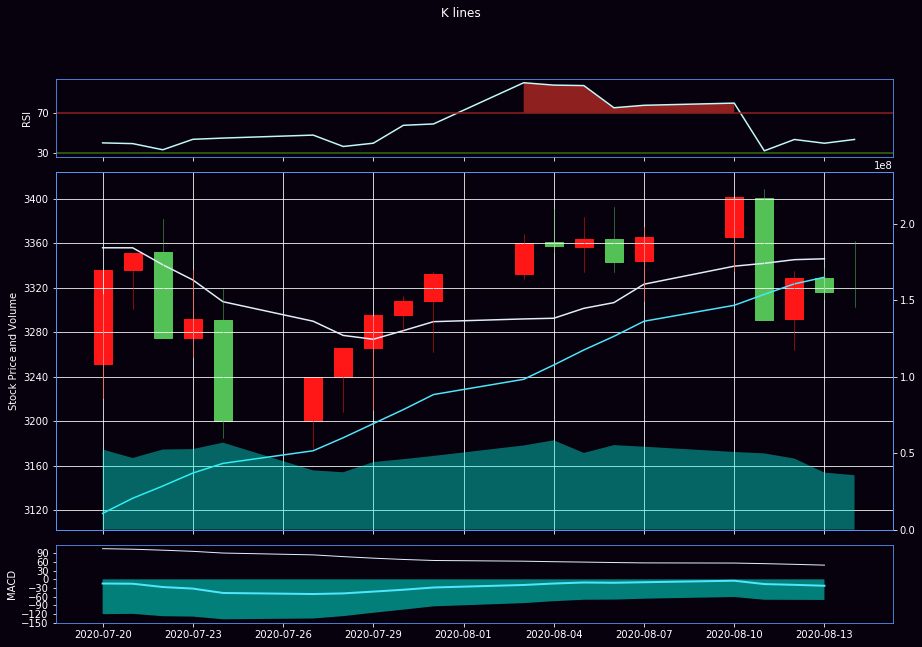

In [57]:
fig = plt.figure(facecolor='#07000d', figsize=(15, 10))
ax = plt.subplot2grid((6, 4), (1, 0), rowspan=4, colspan=4, facecolor='#07000d')
ax.plot(plot_mat.time[50:80].values, mov_avg_ten[50:80], '#e1edf9', label='10days', linewidth=1.5)  
ax.plot(plot_mat.time[50:80].values, mov_avg_thirty[50:80], '#4ee6fd', label='10days', linewidth=1.5)
candlestick_ochl(ax, plot_mat[50:80].values, width=0.6, colorup='#ff1717', colordown='#53c156')
ax.grid(True, color='w')
ax.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax.yaxis.set_major_locator(mticker.MaxNLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.yaxis.label.set_color('w')
ax.spines['bottom'].set_color('#5998ff')
ax.spines['top'].set_color('#5998ff')
ax.spines['left'].set_color('#5998ff')
ax.spines['right'].set_color('#5998ff')
ax.tick_params(axis='y', colors='w')
ax.tick_params(axis='x', colors='w')
plt.ylabel('Stock Price and Volume', color='w')
ax_ = ax.twinx()
ax_.fill_between(plot_mat.time[50:80].values, 0, Volume.volume[50:80].values,
                facecolor='#00ffe8', alpha=0.4)
ax_.grid(False)
ax_.set_ylim(0, 4*Volume.volume[50:80].values.max())
ax_.spines['bottom'].set_color('#5998ff')
ax_.spines['top'].set_color('#5998ff')
ax_.spines['left'].set_color('#5998ff')
ax_.spines['right'].set_color('#5998ff')
ax_.tick_params(axis='y', colors='w')
ax_.tick_params(axis='x', colors='w')
ax0 = plt.subplot2grid((6, 4), (0, 0), sharex=ax, rowspan=1, colspan=4, facecolor='#07000d')
col_rsi = '#c1f9f7'
col_pos = '#8f2020'
col_neg = '#386d13'
ax0.plot(plot_mat.time[50:80].values, plot_mat.rsi[50:80].values, col_rsi, linewidth=1.5)
ax0.axhline(70, color=col_pos)
ax0.axhline(30, color=col_neg)
ax0.fill_between(plot_mat.time[50:80].values, plot_mat.rsi[50:80].values, 70, where=(plot_mat.rsi.values[50:80] >= 70),
                 facecolors=col_pos)
ax0.fill_between(plot_mat.time[50:80].values, plot_mat.rsi[50:80].values, 30, where=(plot_mat.rsi.values[50:80] <= 30),
                 facecolors=col_neg)
ax0.set_yticks([30, 70])
ax0.spines['bottom'].set_color("#5998ff")
ax0.spines['top'].set_color("#5998ff")
ax0.spines['left'].set_color("#5998ff")
ax0.spines['right'].set_color("#5998ff")
ax0.tick_params(axis='x', colors='w')
ax0.tick_params(axis='y', colors='w')
plt.ylabel('RSI', color='w')
ax1 = plt.subplot2grid((6, 4), (5, 0), sharex=ax, rowspan=1, colspan=4, facecolor='#07000d')
ax1.plot(plot_mat.time[50:80].values, plot_mat.macd[50:80].values, color='#4ee6fd', linewidth=2)
ax1.plot(plot_mat.time[50:80].values, plot_mat.dea9[50:80].values, color='#e1edf9', linewidth=1)
ax1.fill_between(plot_mat.time[50:80].values, plot_mat.macd[50:80].values-plot_mat.dea9[50:80].values, 0,
                 alpha=0.5, facecolors='#00ffe8')
ax1.yaxis.set_major_locator(mticker.MaxNLocator())
ax1.spines['bottom'].set_color('#5998ff')
ax1.spines['top'].set_color('#5998ff')
ax1.spines['left'].set_color('#5998ff')
ax1.spines['right'].set_color('#5998ff')
ax1.tick_params(axis='y', colors='w')
ax1.tick_params(axis='x', colors='w')
plt.ylabel('MACD', color='w')

plt.setp(ax.get_xticklabels(), visible=False)  # 隐藏ax的x轴
plt.setp(ax0.get_xticklabels(), visible=False)  # 隐藏ax0的x轴
plt.suptitle('K lines', color='w')  # 绘制标题
plt.plot()